In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
import datetime
%matplotlib inline

In [2]:
def max_stock(data):
    L = []
    for i in set(data["stock"]):
        counter = list(data["stock"].values).count(i)
        L.append(counter)                                        ###L为各股票出现的次数，即交易天数
    stock_id = list(set(data["stock"]))
    stock_m = stock_id[L.index(max(L))]                           ###选出交易天数最全的一只股票
    return stock_m

In [3]:
def best_perf(data, stock_eg, T, N1, N2, D):                                 ###data为原始数据，T为所要比较的涨跌幅的日期，N1，N2为T之前和T之后的时间跨度，K为最大成交总额及涨跌幅对比数

    data['stock'] = data['stock'].astype(str)                       ###更改stock的数据类型为字符型

    start = int(stock_eg[stock_eg['date'] ==  T].index.values-N1-1)-stock_eg.index[0]                  ###寻找T前N+1天的索引位置
    middle = int(stock_eg[stock_eg['date'] == T].index.values)-1-stock_eg.index[0]             ###寻找T日前一日的索引位置
    end = middle+N2                                                 ###统计涨跌幅最后一日的索引位置
    slc = stock_eg.iloc[[start, middle, middle+1, end],:]           ###选出所需计算的股票信息
    
    init = data[data['date'] == slc['date'].values[0]]
    middle = data[data['date'] == slc['date'].values[1]]
    determ = data[data['date'] == slc['date'].values[2]]
    fina = data[data['date'] == slc['date'].values[3]]
    secl_sum = init.append(middle).sort_index()
    secl_sum = secl_sum.append(determ).sort_index()
    secl_sum = secl_sum.append(fina).sort_index()                   ####将所有在T,T-N1-1,T-1，T-1+N2时有数据的股票信息合成一张表
    
    stock_intersect = list(set(init['stock']).intersection(set(middle['stock'])))
    stock_intersect = list(set(stock_intersect).intersection(set(determ['stock'])))
    stock_intersect = list(set(stock_intersect).intersection(set(fina['stock'])))        ###选出在上述四个时段都有数据的股票
    
    stock_f = pd.DataFrame(columns = ['date', 'stock', 'close', 'value', 'turnover_sum', 'turnover_N1', 'turnover_N2', 'change_N1','change_N2'])  ###建立一个空的dataframe
    
    for k in stock_intersect:
        starter = secl_sum[secl_sum['stock'] == k]
        starter = starter[['date', 'stock', 'close', 'value', 'turnover_sum']]
        turn_o = starter['turnover_sum']
        close = starter['close']
        differ_t = (turn_o.values[1]-turn_o.values[0])/turn_o.values[0]                 ###计算T前N1天的成交金额变化率
        differ_c0 = (close.values[1]-close.values[0])/close.values[0]              ###计算T前N1天的涨跌幅
        differ_t2 = (turn_o.values[3]-turn_o.values[1])/turn_o.values[1]                 ###计算T后N2天的成交金额变化率
        differ_c = (close.values[3]-close.values[1])/close.values[1]              ###计算T后N2天的涨跌幅
        stock_a = starter[starter['date'] == T]
        stock_a.insert(5,'turnover_N1',[differ_t/N1])
        stock_a.insert(6,'turnover_N2',[differ_t2/N2])
        stock_a.insert(7,'change_N1',[differ_c0/N1])                    ###插入N1天的平均日涨跌幅
        stock_a.insert(8,'change_N2',[differ_c/N2])                    ###插入N2天的平均日涨跌幅
        stock_f = stock_f.append(stock_a)
    stock_f = stock_f.sort_index()
    stock_f = stock_f[['date', 'stock', 'close', 'value', 'turnover_N1', 'turnover_N2', 'change_N1', 'change_N2']]
    return stock_f

In [4]:
data = pd.read_csv('D:/Documents/Go Abroad/实习/成交金额/Python数据//2017_4/2017.csv',encoding='gbk',engine='python')

In [5]:
#stock_m = max_stock(data)
stock_m = 1
stock_eg = data[data['stock'] == stock_m]

In [6]:
T = '2017-01-09'
N1 = 3
N2 = 5
D = 100
stock_f = best_perf(data, stock_eg, T, N1, N2, D)

In [8]:
stock_f = stock_f.reset_index(drop = True)

In [22]:
stock_min = stock_f.sort_values(by = 'value', ascending = True)
stock_f2 = stock_min.head(100)
stock_f2 = stock_f2.reset_index(drop = True)

In [23]:
stock_f2

,date,stock,close,value,turnover_N1,turnover_N2,change_N1,change_N2
0,2017-01-09,603186,11.32,366202.00,0.835565,2.354708,0.110392,0.122255
1,2017-01-09,2836,20.65,413000.00,1.924460,9.396224,0.110402,0.122216
2,2017-01-09,300585,25.16,503200.00,3.019580,9.651657,0.110400,0.122256
3,2017-01-09,603929,11.45,610972.00,3.189005,3.637369,0.110401,0.122382
4,2017-01-09,603058,17.75,748340.00,2.968230,32.301907,0.110195,0.068649
5,2017-01-09,300576,41.00,820000.00,4.944685,55.380151,0.110357,0.041427
6,2017-01-09,2837,45.93,918600.00,2.990733,278.684467,0.110438,0.034251
7,2017-01-09,2835,34.64,935280.00,2.536358,162.183831,0.110313,0.021975
8,2017-01-09,2833,28.38,946756.80,6.407534,310.819471,0.110423,0.122093
9,2017-01-09,300571,96.44,964400.00,8.742510,14.437226,0.110386,0.028356


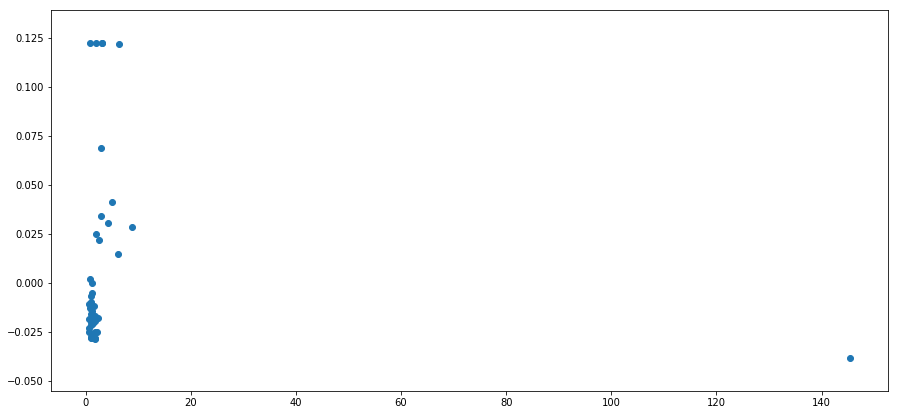

In [21]:
plt.figure(figsize=(15, 7))
plt.scatter(stock_f2['turnover_N1'], stock_f2['change_N2'])